<a href="https://colab.research.google.com/github/LGreenII/CS4410MachineLearning/blob/main/LevonGreenCS4410Week3Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
iris.data.shape

(150, 4)

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [7]:
print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


***Split Data Set***

In [8]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.2)

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [13]:
print(scores.mean())

0.9666666666666668


In [16]:
k_range = range(1,31)
k_scores= []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X, y, cv = 10, scoring= 'accuracy')
  k_scores.append(scores.mean())
print (k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'Cross-Validates Accuracy')

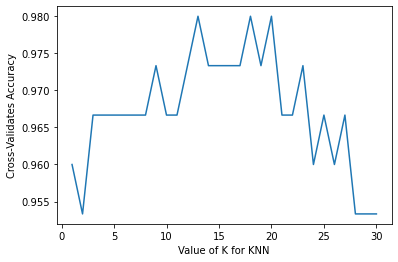

In [17]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validates Accuracy')

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
k_range = range(1, 31)
print (k_range)

range(1, 31)


In [25]:
param_grid = dict(n_neighbors = k_range)
print (param_grid)

{'n_neighbors': range(1, 31)}


In [26]:
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')

In [27]:
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=30),
             param_grid={'n_neighbors': range(1, 31)}, scoring='accuracy')

In [30]:
grid.cv_results_

{'mean_fit_time': array([0.00079246, 0.00056145, 0.00054026, 0.00079627, 0.00082846,
        0.00055451, 0.00054412, 0.00057766, 0.00058022, 0.00055678,
        0.00053842, 0.00058122, 0.00055428, 0.00057242, 0.00053425,
        0.00052927, 0.00054708, 0.00060005, 0.00062397, 0.00054748,
        0.00055218, 0.00054994, 0.00053637, 0.00057123, 0.00057642,
        0.00054011, 0.00054274, 0.00091999, 0.00054471, 0.00054758]),
 'std_fit_time': array([2.53372659e-04, 1.23008507e-05, 9.80535357e-06, 2.23841929e-04,
        2.65956557e-04, 2.57661552e-05, 2.01620374e-05, 1.09228783e-04,
        8.03849162e-05, 2.41312229e-05, 8.08027966e-06, 1.34878125e-04,
        2.54868903e-05, 9.08567785e-05, 1.95380498e-05, 8.25524115e-06,
        2.37688377e-05, 1.15416452e-04, 1.00864385e-04, 1.70838350e-05,
        7.10480165e-05, 1.06197748e-05, 7.85411017e-06, 7.01314198e-05,
        7.72802150e-05, 1.56200383e-05, 1.77198745e-05, 2.43062335e-04,
        2.18519570e-05, 1.37098146e-05]),
 'mean_scor

Based on GridSearchCV, the best parameters is when K=13 which is confirmed below



In [37]:
grid.best_params_

{'n_neighbors': 13}